# Import 

In [2]:
import pandas as pd
import tensorflow
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense,Dropout,Activation,Conv2D,Reshape
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import *
import math
import time
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Read Date

In [4]:
df = pd.read_csv('data/6150.csv' , encoding='big5')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 22 columns):
時間             423 non-null object
Open           423 non-null float64
High           423 non-null float64
Low            423 non-null float64
Close          423 non-null float64
SMA5           423 non-null float64
SMA10          423 non-null float64
SMA20          423 non-null float64
SMA60          423 non-null float64
Vol            423 non-null float64
MA5            423 non-null float64
MA10           423 non-null float64
DIF12-26       423 non-null float64
MACD9          423 non-null float64
OSC            423 non-null float64
K              423 non-null object
D              423 non-null object
RSI 6          423 non-null object
RSI 12         423 non-null object
BBand width    423 non-null object
Band%EMA3      423 non-null object
TaiwnaAll      426 non-null float64
dtypes: float64(15), object(7)
memory usage: 73.3+ KB


In [6]:
df['K'] = df['K'].str.replace('%','').astype('float')
df['D'] = df['D'].str.replace('%','').astype('float')
    

In [7]:
# plt.figure(figsize = (15,5))
# plt.plot(df2.Close.values , color='red' , label='Close')
# plt.plot(df2.MACD9.values , color='blue' , label='MACD9')
# plt.plot(df2.SMA5.values , color='green' , label= 'SMA5')
# plt.plot(df2.SMA10.values , color='black' , label='SMA10')
# plt.plot(df2.K.values , color='yellow' , label='K')
# plt.plot(df2.D.values , color='grey' , label='D')

# plt.title('2330')
# plt.xlabel('Days')
# plt.ylabel('price')
# plt.legend(loc='best')
# plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 22 columns):
時間             841 non-null object
Open           841 non-null float64
High           841 non-null float64
Low            841 non-null float64
Close          841 non-null float64
SMA5           841 non-null float64
SMA10          841 non-null float64
SMA20          841 non-null float64
SMA60          841 non-null float64
Vol            841 non-null int64
MA5            841 non-null int64
MA10           841 non-null int64
DIF            841 non-null float64
MACD9          841 non-null float64
OSC            841 non-null float64
K              841 non-null float64
D              841 non-null float64
RSIx6          841 non-null object
RSIx12         841 non-null object
BBand width    841 non-null object
Band%EMA3      841 non-null object
TaiwanAll      841 non-null float64
dtypes: float64(14), int64(3), object(5)
memory usage: 144.6+ KB


In [8]:
df = pd.read_csv('data/6150.csv' , encoding='big5')

In [9]:
df.tail(10)

,時間,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,DIF12-26,MACD9,OSC,K,D,RSI 6,RSI 12,BBand width,Band%EMA3,TaiwnaAll
416,2018/4/18,243.5,250.0,225.0,235.0,282.1,339.55,346.98,256.23,20878.0,...,0.98,21.82,-20.84,11.79%,26.15%,17.26%,32.77%,55.60%,51.71%,10919.49
417,2018/4/19,238.0,250.0,211.5,211.5,256.1,322.70,341.23,257.91,2099.0,...,-6.93,16.07,-23.00,7.86%,20.06%,14.42%,29.90%,66.20%,58.96%,10888.27
418,2018/4/20,190.5,190.5,190.5,190.5,232.7,300.25,333.65,259.05,806.0,...,-15.50,9.75,-25.26,5.24%,15.12%,12.26%,27.55%,78.32%,68.64%,10821.53
419,2018/4/23,171.5,190.5,171.5,181.0,213.5,276.85,325.03,259.83,2880.0,...,-22.80,3.24,-26.04,4.84%,11.69%,11.34%,26.52%,89.92%,79.28%,10893.53
420,2018/4/24,182.0,184.0,163.0,163.0,196.2,253.25,313.75,260.29,1215.0,...,-29.27,-3.26,-26.01,3.23%,8.87%,9.69%,24.62%,101.38%,90.33%,10927.18
421,2018/4/25,158.0,178.5,150.5,178.5,184.9,233.50,304.23,260.93,2183.0,...,-33.74,-9.35,-24.39,6.58%,8.11%,21.53%,29.37%,109.96%,100.14%,10974.02
422,2018/4/26,175.0,182.5,172.0,175.0,177.6,216.85,294.38,261.73,1588.0,...,-36.50,-14.78,-21.72,9.85%,8.69%,20.79%,28.92%,117.70%,108.92%,10955.29
423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10965.39
424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10954.55
425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10810.45


In [10]:
def batch_data( time_steps,sd,batch_size,feature_list):

    df = pd.read_csv('data/2377.csv' , encoding='big5')
#     print(df.shape)
#     df=df[:-7]
#     print(df.shape)
    df['RSI6'] = df['RSIx6'].str.replace('%','').astype('float') 
    df['RSI6'] = df['RSI6'] * 0.01
    df['RSI12'] = df['RSIx12'].str.replace('%','').astype('float') 
    df['RSI12'] = df['RSI12'] * 0.01
    
    
#     del df['Date']
#     del df['DIF']
#     del df['K']
#     del df['D']
#     del df['MACD9']
#     del df['OSC']
#     del df['SMA60']
#     del df['MA10']
#     del df['MA5']
#     del df['SMA20']
#     del df['SMA10']

    #_data = df.drop(['Date'],['DIF'],['K'],['D'],['MACD9'],['OSC'], axis=1)
    #df.drop(['Date'],axis=1)
    # df.drop(['DIF'],axis=1)
    # df.drop(['K'],axis=1)
    # df.drop(['D'],axis=1)
    # df.drop(['MACD9'],axis=1)
    # df.drop(['OSC'],axis=1)
    df['K'] = df['K'].str.replace('%','').astype('float')
    df['K'] = df['K'] * 0.01
    
    df['D'] = df['D'].str.replace('%','').astype('float')
    df['D'] = df['D'] * 0.01

    df['Vol']= df['Vol'].astype('float')
    df['Open'] = df['Open'].astype('float')
    df['High'] = df['High'].astype('float')
    df['Low'] = df['Low'].astype('float')
    df['Close'] = df['Close'].astype('float')
    df['SMA5'] = df['SMA5'].astype('float')
    df['SMA10'] = df['SMA10'].astype('float')
    df['SMA20'] = df['SMA20'].astype('float')
    df['SMA60'] = df['SMA60'].astype('float')
    df['MA5'] = df['MA5'].astype('float')
    df['MA10'] = df['MA10'].astype('float')
    
    
#     sd = -1

    df['label']=(df['Close'].shift(sd)-df['Close']>=0).astype('int')


    Y =df['label']
    Y = np_utils.to_categorical(Y)
    #first time train
    #X = df[['Vol','Open','High','Low','Close']]
    # acc 65
    
    #second
    #X = df[['Vol','Open','High','Low','Close','MA5']]
    
    #third
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10']]
    
    #4
    X = df[feature_list]
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10','SMA5','SMA10','SMA20']]
    

    Y = np.array(Y)
    X = np.array(X)
    
    m = MinMaxScaler(feature_range=(0,1))
    X=m.fit_transform(X)

    X_t = []
    Y_t = []
    
    
    
    
    for i in range(0, X.shape[0] - time_steps):
        

        X_t.append(X[i:i+time_steps])
        Y_t.append(Y[i+time_steps])
    X_t = np.array(X_t)
    Y_t = np.array(Y_t)
    
    dn = X_t.shape[0]%batch_size
    X_t = X_t[dn:]
    Y_t = Y_t[dn:]
    
    
      
#     X_t,Y_t=shuffle(X_t, Y_t, random_state=0)
    
    X_t_batch_train=X_t[:-batch_size]
    Y_t_batch_train=Y_t[:-batch_size]

    X_t_batch_test=X_t[-batch_size:]
    Y_t_batch_test=Y_t[-batch_size:]
    return X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df
    
    

In [11]:
df.head()

,時間,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,DIF12-26,MACD9,OSC,K,D,RSI 6,RSI 12,BBand width,Band%EMA3,TaiwnaAll
0,2016/7/21,9.00,9.00,8.89,8.90,8.88,8.79,8.27,7.73,31.0,...,0.35,0.29,0.06,60.61%,64.21%,66.10%,67.13%,27.45%,26.84%,9056.56
1,2016/7/22,8.90,8.90,8.83,8.83,8.90,8.87,8.33,7.73,19.0,...,0.34,0.30,0.04,54.32%,60.91%,59.90%,64.30%,27.17%,27.01%,9013.14
2,2016/7/25,9.00,9.09,8.90,9.00,8.92,8.93,8.39,7.74,71.0,...,0.34,0.31,0.03,48.72%,56.85%,68.51%,67.89%,27.14%,27.07%,8991.67
3,2016/7/26,8.90,9.00,8.88,8.89,8.90,8.91,8.45,7.74,209.0,...,0.33,0.31,0.02,47.56%,53.75%,58.72%,63.39%,26.55%,26.81%,9024.79
4,2016/7/27,8.89,9.15,8.89,8.91,8.91,8.89,8.50,7.75,151.0,...,0.32,0.32,0.01,47.26%,51.59%,59.97%,63.86%,25.65%,26.23%,9063.39


In [12]:
df.shape

(426, 22)

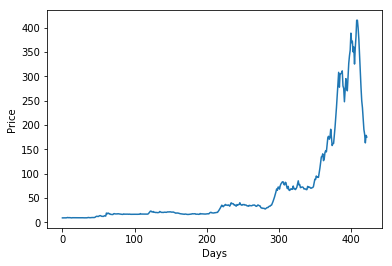

In [13]:
#dates = pd.to_datetime(df['Date'] , format='%Y%m%d')
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [14]:
batch_size= 128
LR= 0.005
epoch= 1000
input_size= 6
time_steps= 6
sd = -3

In [15]:
# feature_list_try = ['SMA5', 'SMA10', 'SMA20',
#        'SMA60', 'MA5', 'MA10', 'DIF', 'MACD9', 'OSC', 'K', 'D','S_P500','SOXX','ADR']
# feature_list_try = ['S_P500','SOXX','ADR','RSI6','RSI12']
# feature_list_try = ['RSI6','TaiwanAll','RSI12','SMA5','MA5']
feature_list_try = ['TaiwanAll','RSI6','RSI12','SMA5','MA5']

new feature:  TaiwanAll


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(128, 6, 6..., return_sequences=True, stateful=False, units=256)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, stateful=False, units=128)`


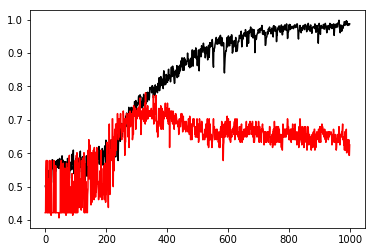

640/640 [==============================] - 0s 44us/step
train_score: [0.007732776482589543, 1.0]
128/128 [==============================] - 0s 29us/step
test_score: [3.350369930267334, 0.625]
new feature:  RSI6


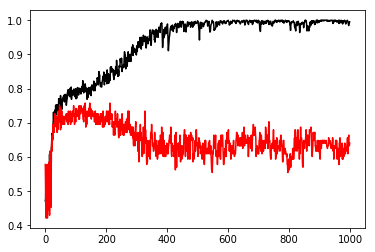

640/640 [==============================] - 0s 30us/step
train_score: [0.00017019758743117564, 1.0]
128/128 [==============================] - 0s 56us/step
test_score: [4.009763717651367, 0.640625]
new feature:  RSI12


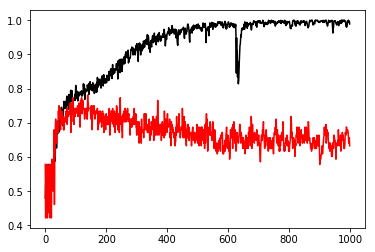

640/640 [==============================] - 0s 36us/step
train_score: [0.015629520965740086, 0.9953125]
128/128 [==============================] - 0s 46us/step
test_score: [3.6404576301574707, 0.6328125]
new feature:  SMA5


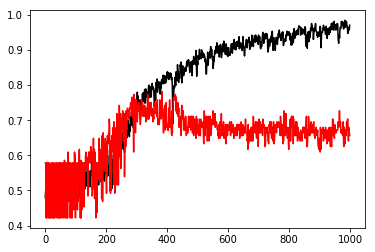

640/640 [==============================] - 0s 43us/step
train_score: [0.04400559291243553, 0.978125]
128/128 [==============================] - 0s 30us/step
test_score: [2.5216994285583496, 0.65625]
new feature:  MA5


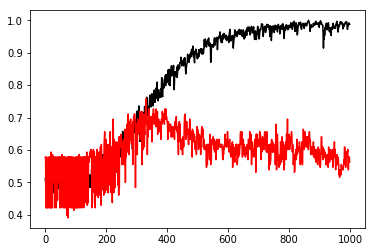

640/640 [==============================] - 0s 39us/step
train_score: [0.00686645224923268, 0.9984375]
128/128 [==============================] - 0s 34us/step
test_score: [4.863652229309082, 0.5625]


In [17]:

for i in range(len(feature_list_try)):
    feature_list = ['Open', 'High', 'Low', 'Close','Vol']
    feature_list.append(feature_list_try[i])
    input_size = len(feature_list)
    print('new feature: ',feature_list_try[i])
    model =Sequential()
    model.add(LSTM(
                batch_input_shape=(batch_size,time_steps,input_size),
                output_dim=256,
                return_sequences=True,
                stateful=False,
            ))
    model.add(Dropout(0.6))
    model.add(LSTM(
            output_dim=128,
                return_sequences=False,
                stateful=False,
             ))
    model.add(Dropout(0.6))
    model.add(Dense(256))
    model.add(Dropout(0.4))
    model.add(Dense(128))
    model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Dense(2,activation='softmax'))
    adam = Adam(LR)
    #     model.summary()
    model.compile(optimizer=adam,
                      loss='categorical_crossentropy',metrics=['accuracy'])
    X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df=batch_data(time_steps,-sd,batch_size,feature_list)
    train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)
    plt.plot(train_history.history['acc'],color='black')
    plt.plot(train_history.history['val_acc'],color='red')
    plt.show()

    score = model.evaluate(X_t_batch_train,Y_t_batch_train, verbose=1,batch_size=128)
    print('train_score:', score)
    score = model.evaluate(X_t_batch_test,Y_t_batch_test, verbose=1,batch_size=128)
    print('test_score:', score)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 25 columns):
時間             841 non-null object
Open           841 non-null float64
High           841 non-null float64
Low            841 non-null float64
Close          841 non-null float64
SMA5           841 non-null float64
SMA10          841 non-null float64
SMA20          841 non-null float64
SMA60          841 non-null float64
Vol            841 non-null float64
MA5            841 non-null float64
MA10           841 non-null float64
DIF            841 non-null float64
MACD9          841 non-null float64
OSC            841 non-null float64
K              841 non-null float64
D              841 non-null float64
RSIx6          841 non-null object
RSIx12         841 non-null object
BBand width    841 non-null object
Band%EMA3      841 non-null object
TaiwanAll      841 non-null float64
RSI6           841 non-null float64
RSI12          841 non-null float64
label          841 non-null int64
dt

In [29]:
df = pd.read_csv('data/6150.csv' , encoding='big5')
df_val = df[-batch_size:]

In [30]:
predictions = Y_t_batch_test[:,1]

In [31]:
df_val.iloc[0]

時間             2017/10/20
Open                 64.7
High                 68.2
Low                  64.7
Close                65.5
SMA5                60.76
SMA10               50.18
SMA20               40.05
SMA60               36.22
Vol                   679
MA5                  1502
MA10                 1721
DIF12-26             7.89
MACD9                4.19
OSC                   3.7
K                  96.88%
D                  97.47%
RSI 6              86.52%
RSI 12             85.89%
BBand width       132.18%
Band%EMA3         121.63%
TaiwnaAll         10469.4
Name: 298, dtype: object

In [41]:
holding = 0

trade_record=[]
profit=[]
for i in range(len(predictions)):
    prediction = predictions[i]
    price = float(df_val.iloc[i]['Close'])
    K = float(df_val.iloc[i]['K'].replace('%',''))
    D = float(df_val.iloc[i]['D'].replace('%',''))
    RSI = float(df_val.iloc[i]['RSI 6'].replace('%',''))
    
    if holding == 0:
        if prediction ==1 or (K<30 and D<30) or (RSI < 40) :
            print('----')
            print(K,D)
            
            

            p_d = [price,i,'BUY']
            trade_record.append(p_d)
            holding=1
            continue
    if holding ==1:
        last_trade = trade_record[-1]
        if last_trade[2]=='BUY':
            buy_price=last_trade[0]
            buy_i = last_trade[1]
            if (price/buy_price-1)>0.03 or i-buy_i>14 or (RSI > 75) and (K>70 and D>70) :
                print('++++++')
                print(K,D)
#                 print((buy_i-i))
                p_d_s=[price,i,'SELL']
                trade_record.append(p_d_s)
                holding=0
                profit.append(price-buy_price)

----
94.22 96.49
++++++
88.72 91.87
----
87.94 90.56
++++++
90.13 90.42
----
51.88 70.89
++++++
70.46 57.79
----
77.62 64.4
++++++
50.78 39.2
----
42.06 42.2
++++++
65.06 51.02
----
79.1 75.17
++++++
84.83 78.85
----
85.71 86.28
++++++
87.84 85.8
----
81.07 85.13
++++++
68.04 61.71
----
90.53 79.18
++++++
93.69 84.02
----
94.49 87.51
++++++
90.47 88.81
----
86.89 88.17
++++++
83.98 86.78
----
81.68 85.08
++++++
62.65 48.87
----
79.13 73.22
++++++
62.95 55.5
----
51.05 61.44


AttributeError: 'float' object has no attribute 'replace'

In [42]:
sum(profit)

134.0

In [43]:
trade_record

[[72.0, 2, 'BUY'],
 [74.8, 4, 'SELL'],
 [78.7, 5, 'BUY'],
 [81.0, 6, 'SELL'],
 [72.9, 13, 'BUY'],
 [78.9, 28, 'SELL'],
 [85.0, 29, 'BUY'],
 [72.3, 44, 'SELL'],
 [71.1, 49, 'BUY'],
 [80.4, 51, 'SELL'],
 [93.2, 56, 'BUY'],
 [101.0, 58, 'SELL'],
 [147.0, 67, 'BUY'],
 [158.5, 69, 'SELL'],
 [175.0, 75, 'BUY'],
 [195.5, 80, 'SELL'],
 [260.0, 83, 'BUY'],
 [286.0, 84, 'SELL'],
 [308.0, 85, 'BUY'],
 [305.0, 87, 'SELL'],
 [305.0, 88, 'BUY'],
 [307.0, 89, 'SELL'],
 [311.0, 90, 'BUY'],
 [326.5, 99, 'SELL'],
 [369.0, 103, 'BUY'],
 [415.0, 110, 'SELL'],
 [341.5, 114, 'BUY']]

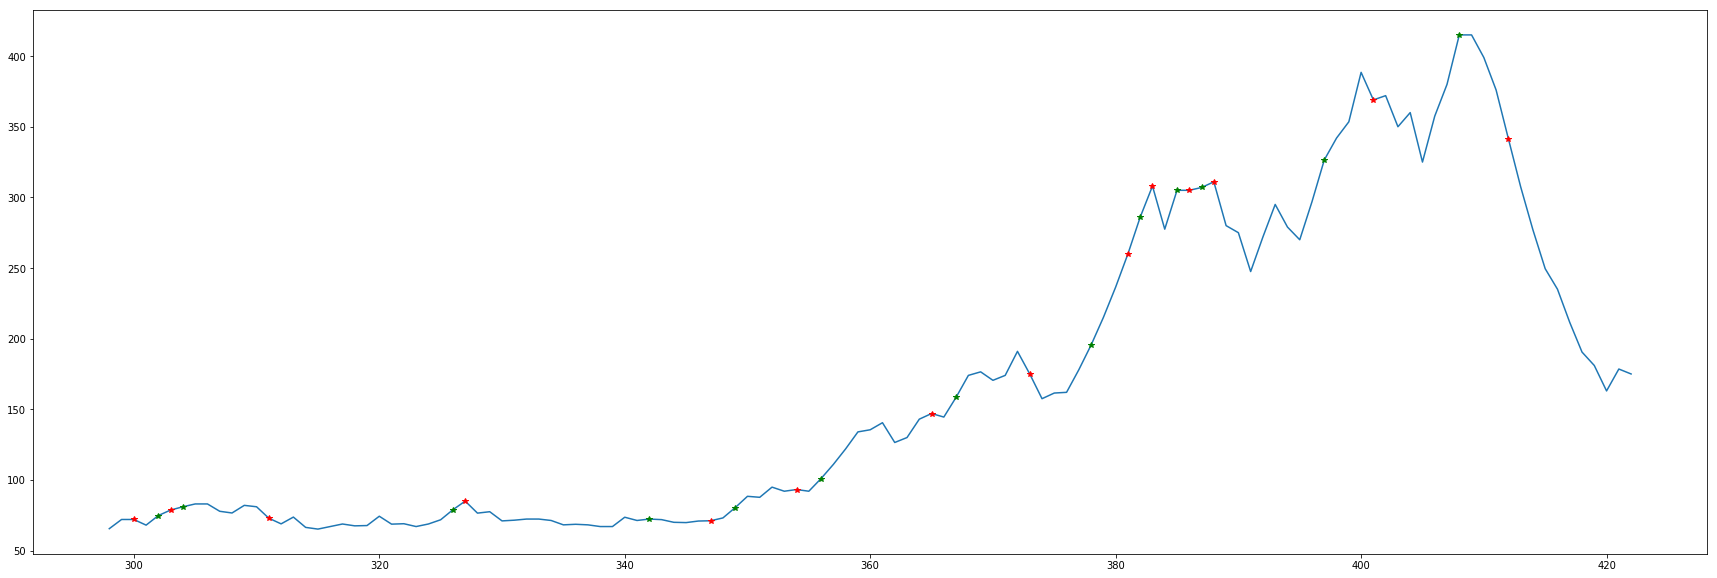

In [44]:
start = df_val['Close'].index[0]
plt.figure(figsize = (30,10))
plt.plot(df_val['Close'])
for i in trade_record:
    x=i[1]+start
    y = i[0]
    action = i[2]
    if action=='BUY':
        plt.plot(x,y,color='red',marker='*')
    else:
        plt.plot(x,y,color='green',marker='*')